<a href="https://colab.research.google.com/github/gracekavemba/cyberpro_week_5_Assignment/blob/main/Grace_Ndunda_Cyber_Security_Attack_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cyber Security Attack Analysis

Analysing Data to come up with Insights


Questions to be answered


1. Which year had the largest number of affected users?

2. Which was the most frequent attack type?

3. Which industry was more prone to attack?

4. Which year had the largest financial loss?

5. What is the most frequent attack source?


# Importing liblaries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read csv

In [2]:

df = pd.read_csv("GCT.csv")
df.head()



,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


# EDA

In [3]:
#checking dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


In [4]:
df.describe ()

,Year,Financial Loss (in Million $),Number of Affected Users,Incident Resolution Time (in Hours)
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2019.570333,50.492970,504684.136333,36.476000
std,2.857932,28.791415,289944.084972,20.570768
min,2015.000000,0.500000,424.000000,1.000000
25%,2017.000000,25.757500,255805.250000,19.000000
50%,2020.000000,50.795000,504513.000000,37.000000
75%,2022.000000,75.630000,758088.500000,55.000000
max,2024.000000,99.990000,999635.000000,72.000000


In [49]:
#Which year had the largest number of affected users?
Affected_Users = df.groupby(["Year"])["Number of Affected Users"].nlargest(1)
Affected_Users = Affected_Users.reset_index() # Convert the Series to a DataFrame
Affected_Users.sort_values(['Number of Affected Users', 'Year'], ascending=False).groupby('Year').head(3)

,Year,level_1,Number of Affected Users
8,2023,2045,999635
7,2022,323,999545
5,2020,2240,999542
1,2016,2004,999508
9,2024,1515,998833
6,2021,2852,998728
4,2019,928,998507
0,2015,2990,998011
2,2017,621,996762
3,2018,2327,982450


insight: 2023 Seems to have the largest number of affected users.

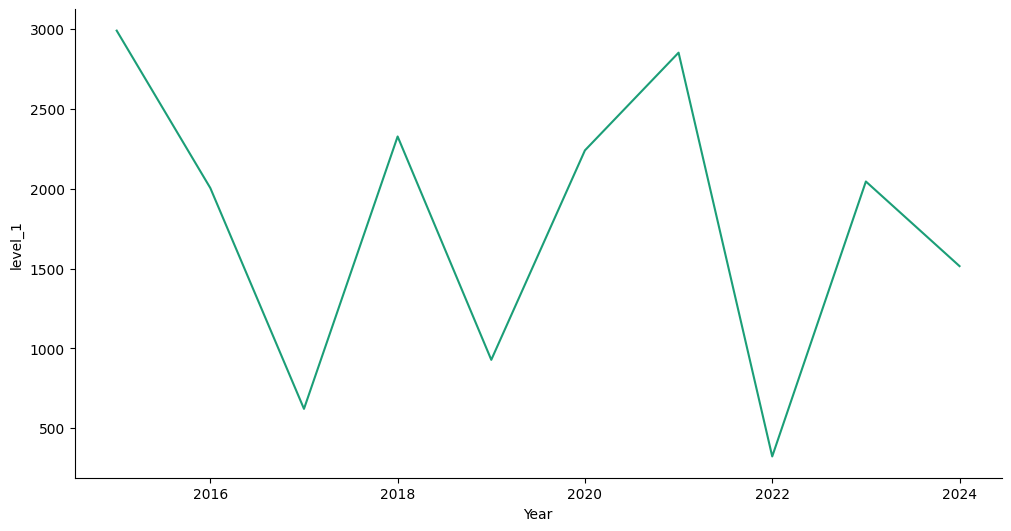

In [48]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['level_1']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_20.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('level_1')

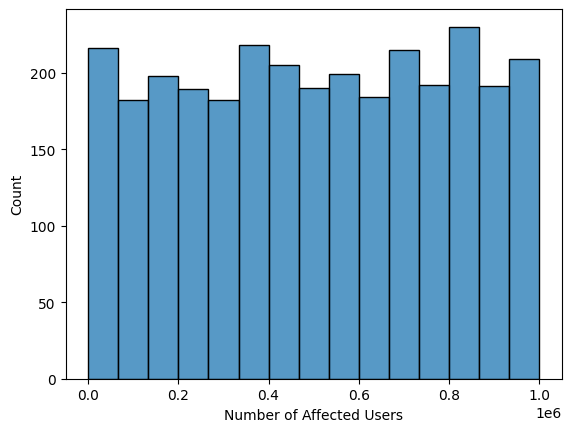

In [15]:
sns.histplot(data=df, x="Number of Affected Users")
plt.show()

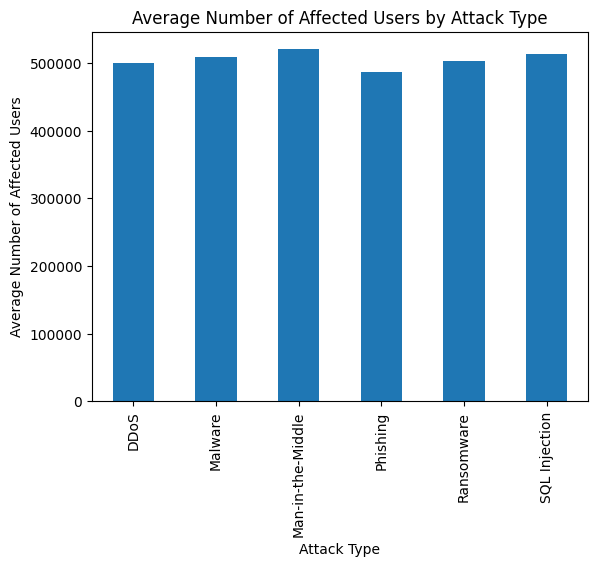

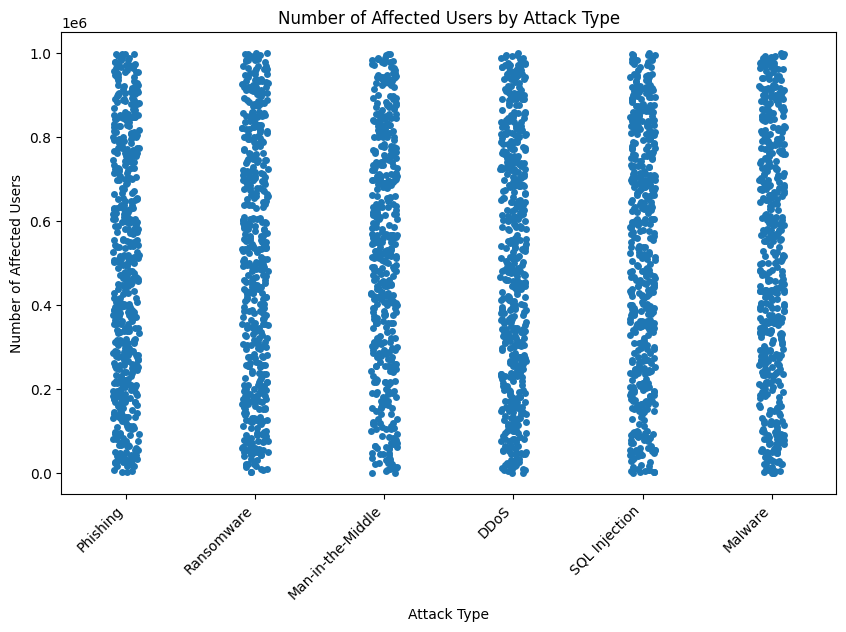

In [50]:
# Convert 'Number of Affected Users' to numeric if it's not already
df['Number of Affected Users'] = pd.to_numeric(df['Number of Affected Users'], errors='coerce')

# Instead of a line plot, consider a bar plot or a scatter plot to visualize the relationship
# between 'Number of Affected Users' and 'Attack Type'

# Option 1: Bar plot (shows the average number of affected users for each attack type)
df.groupby('Attack Type')['Number of Affected Users'].mean().plot(kind='bar')
plt.ylabel('Average Number of Affected Users')
plt.title('Average Number of Affected Users by Attack Type')
plt.show()

# Option 2: Scatter plot (shows individual data points)
# If 'Number of Affected Users' has many unique values, a scatter plot might be more suitable
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.stripplot(x='Attack Type', y='Number of Affected Users', data=df, jitter=True)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.ylabel('Number of Affected Users')
plt.title('Number of Affected Users by Attack Type')
plt.show()

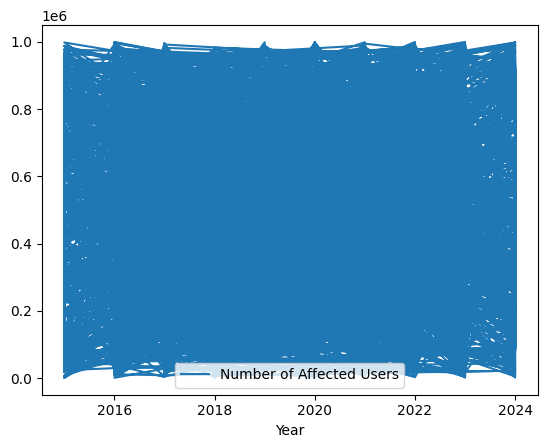

In [58]:

df.plot(x='Year', y='Number of Affected Users', kind='line') # Removed the extra closing parenthesis from 'Number of Affected Users'
plt.show() # Added plt.show() to display the plot

Note this line plot isnt clear enough would nt recommend

In [23]:
#Which was the most frequent attack type?
freq_table=df.groupby(['Attack Type']).size().reset_index(name='Count')
freq_table


,Attack Type,Count
0,DDoS,531
1,Malware,485
2,Man-in-the-Middle,459
3,Phishing,529
4,Ransomware,493
5,SQL Injection,503


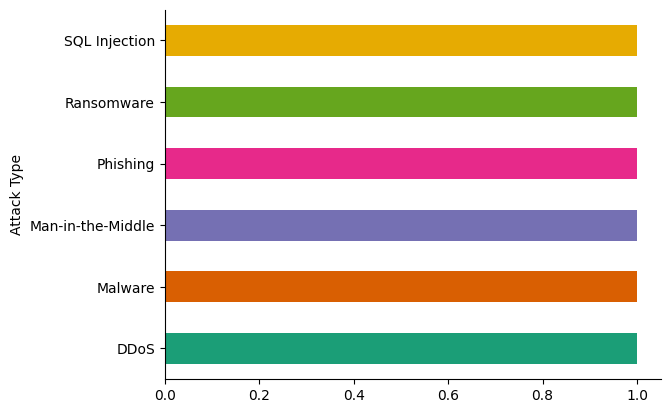

In [25]:
# @title Attack Type

from matplotlib import pyplot as plt
import seaborn as sns
freq_table.groupby('Attack Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

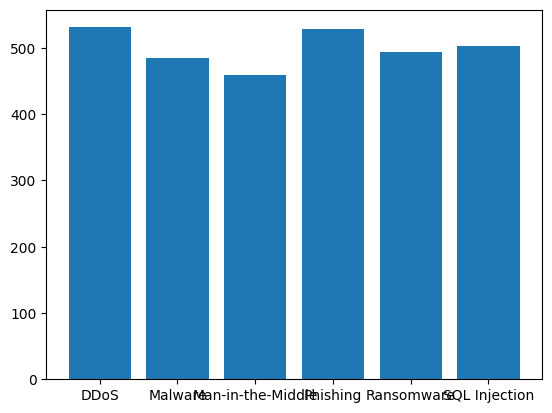

In [24]:
import matplotlib.pyplot as plt
# bar charts are used to display value associated with categorical data
plt.bar(freq_table['Attack Type'],freq_table['Count'])
plt.show()

DDOs has is the most frequent attack type meaning many attackers used it to commit cyber attacks.

In [29]:
#Which Security Vulnerability Type led to cyber attacks?
fre_table=df.groupby(['Security Vulnerability Type']).size().reset_index(name='Count')
fre_table

,Security Vulnerability Type,Count
0,Social Engineering,747
1,Unpatched Software,738
2,Weak Passwords,730
3,Zero-day,785


<ipython-input-30-ebc7d63867d6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(fre_table, x='Count', y='Security Vulnerability Type', inner='stick', palette='Dark2')


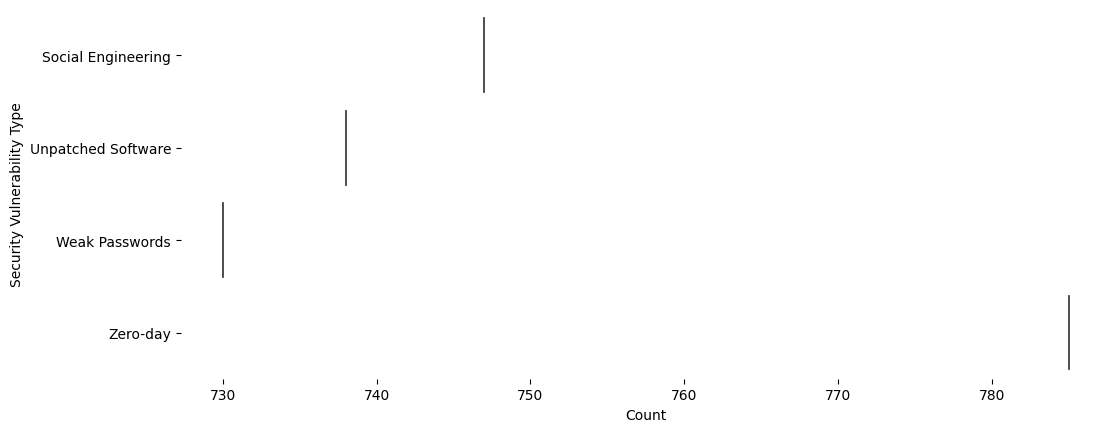

In [30]:
# @title Security Vulnerability Type vs Count

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(fre_table['Security Vulnerability Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(fre_table, x='Count', y='Security Vulnerability Type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Many attacks were as a result of zero day.
GTIG defines a zero-day as a vulnerability that was maliciously exploited in the wild before a patch was made publicly available

In [34]:
#Which industry was largely targetted by attackers?
target_table=df.groupby(['Target Industry']).size().reset_index(name='Count')
target_table

,Target Industry,Count
0,Banking,445
1,Education,419
2,Government,403
3,Healthcare,429
4,IT,478
5,Retail,423
6,Telecommunications,403


<ipython-input-36-ebc8b8f4590b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(target_table, x='Count', y='Target Industry', inner='stick', palette='Dark2')


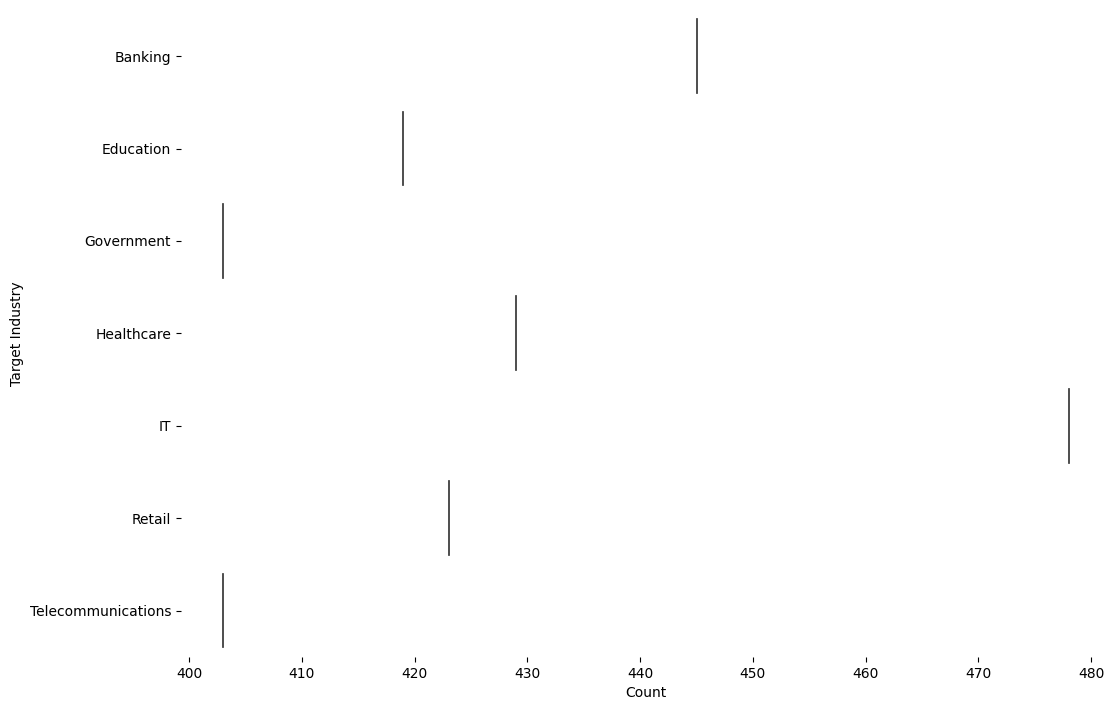

In [36]:
# @title Target Industry vs Count

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(target_table['Target Industry'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(target_table, x='Count', y='Target Industry', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

It industry is the leading industry facing cyber security threats. Why?The IT industry faces cybersecurity threats due to the inherent value of its information, a large attack surface, and its tendency to embrace new technologies that may be less secure

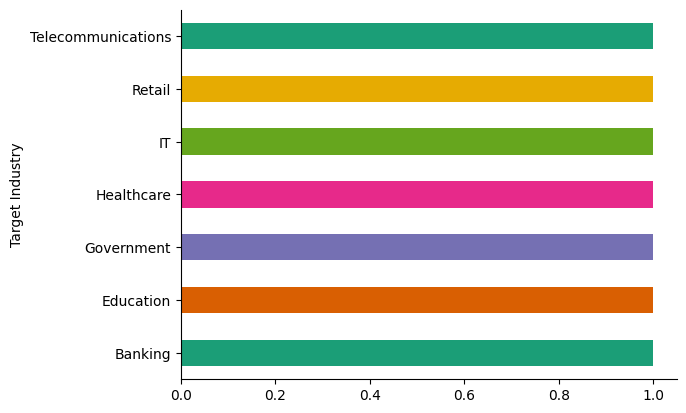

In [35]:
# @title Target Industry

from matplotlib import pyplot as plt
import seaborn as sns
target_table.groupby('Target Industry').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [37]:
#What is the most frequent attack source?
Attack_table=df.groupby(['Attack Source']).size().reset_index(name='Count')
Attack_table

,Attack Source,Count
0,Hacker Group,686
1,Insider,752
2,Nation-state,794
3,Unknown,768


<ipython-input-52-61ec9e1eae4f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(Attack_table, x='Count', y='Attack Source', inner='stick', palette='Dark2')


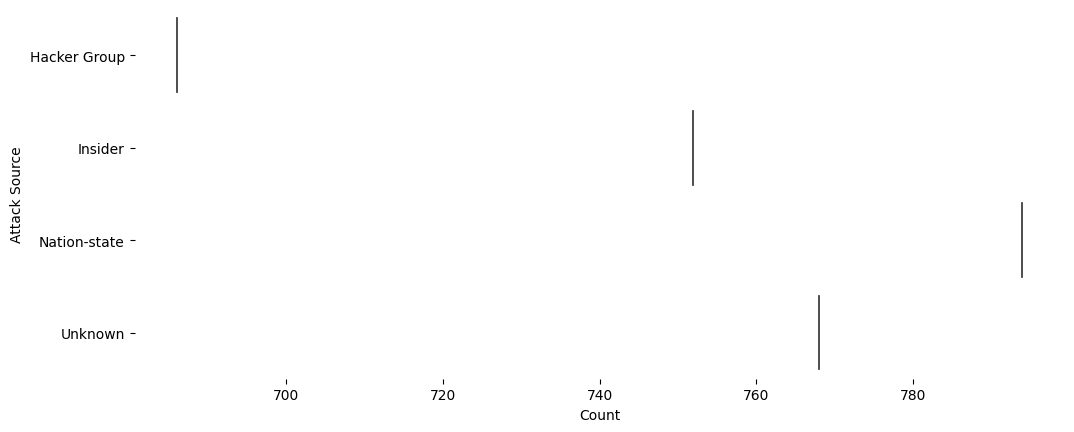

In [52]:
# @title Attack Source vs Count

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(Attack_table['Attack Source'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(Attack_table, x='Count', y='Attack Source', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

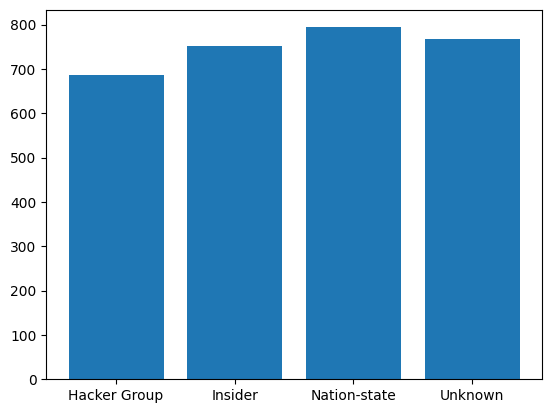

In [39]:
# bar charts are used to display value associated with categorical data
plt.bar(Attack_table['Attack Source'],Attack_table['Count'])
plt.show()

Nation state is the leading source of attack.
Why?Nation-state actors are leading cyber threats due to their access to resources, sophisticated tools, and long-term goals

In [53]:
#which year had the largest financia loss due to cyber attacks
financial_Loss = df.groupby(["Year"])["Financial Loss (in Million $)"].nlargest(1)
financial_Loss = financial_Loss.reset_index() # Convert the Series to a DataFrame
financial_Loss.sort_values(['Financial Loss (in Million $)', 'Year'], ascending=False).groupby('Year').head(3)

,Year,level_1,Financial Loss (in Million $)
9,2024,2030,99.99
2,2017,1806,99.99
1,2016,2133,99.98
4,2019,419,99.97
5,2020,1363,99.90
0,2015,2092,99.83
6,2021,2428,99.81
3,2018,649,99.78
8,2023,1370,99.72
7,2022,33,98.47


2024 and 2017 are leading years with the largest financial lost due to cyber security threats.
